In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_mnist import *
from experiment_constant import *
from experiment_random import *
from scipy.special import expit
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [96]:
x_train = np.random.randn(10, 100)
y_train = np.sum(x_train, axis = 1) / 10

In [97]:
y_train

array([ 0.01058191,  0.48103066,  0.92924492, -0.70529067, -0.7672039 ,
        0.25735404,  0.47644801,  0.16920577,  0.24380091, -0.95144637])

In [98]:
model = Sequential()
model.add(Dense(20, input_shape = (100, ),
                    kernel_initializer = Constant(np.random.randn(3, 20) * np.sqrt(2. / 3)),
                    activation = get_custom_activation(1, 'sigmoid'),
                    bias_initializer = 'random_normal'))
model.add(Dense(20, input_shape = (20, ),
                    kernel_initializer = Constant(np.random.randn(20,20) * np.sqrt(2. / 20)),
                    activation = get_custom_activation(1, 'sigmoid'),
                    bias_initializer = 'random_normal'))
model.add(Dense(1, kernel_initializer = Constant(np.random.randn(20, 1) * np.sqrt(2. / 20)),
                    activation = 'linear',
                    bias_initializer = 'random_normal'))
model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.SGD(),
              metrics=['mean_absolute_error'])

### Test first:
$$\sum\limits_{i,j}\frac{\partial y_k}{\partial w_{ij}}w_{ij}=\sum\limits_{j}\frac{\partial y_k}{\partial x_j}x_j
    = -\frac{1}{p}(\mathbb{E}_\xi\Delta_L^k+O(p^2))$$

In [106]:
loss = []
errors = []
p = 0.1
for i in tqdm(range(10)):
    history = model.fit(x_train, y_train, epochs = 1, batch_size = 500, verbose = False)
    W = model.get_weights()[0::2]
    B = model.get_weights()[1::2]
    exp = ConstantExperiment([100, 20, 20, 1], [p, 0], 1, W, B, 'sigmoid', do_print = False)
    err = np.mean([exp.get_exact_error_v3(x) for x in x_train])
    errors += [err]
    loss += [history.history['loss'][0]]

100%|██████████| 10/10 [00:10<00:00,  1.13s/it]


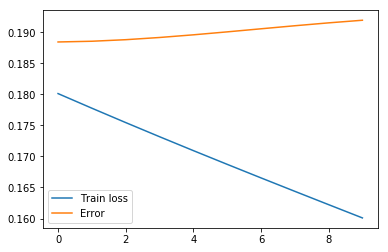

In [111]:
plt.figure()
plt.plot(loss, label = 'Train loss')
plt.plot(np.array(errors) * 30, label = 'Error')
plt.legend()
plt.show()

In [82]:
np.mean([exp.get_exact_error_v3(x) for x in x_train])

0.05780722268306074

In [92]:
exp.get_exact_error_v3(x_train[0])

array([[0.04681731]])